# Setup

In [1]:
import pandas as pd
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [2]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Loading the data

In [16]:
data, meta = arff.loadarff('/Users/iossifpalli/Documents/GitHub/MLOps_Team_33/MLOps_Team_33/dataset/CEE_DATA.arff')
df = pd.DataFrame(data)
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x) #Encoding from byte to string 

In [5]:
print("DataFrame Description:")
df.describe(include='all')

DataFrame Description:


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
count,666,666,666,666,666,666,666,666,666,666,666,666
unique,4,2,4,3,6,3,3,3,4,4,8,9
top,Good,male,General,WA,TWO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
freq,210,355,329,449,368,396,368,536,511,398,277,442


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Performance           666 non-null    object
 1   Gender                666 non-null    object
 2   Caste                 666 non-null    object
 3   coaching              666 non-null    object
 4   time                  666 non-null    object
 5   Class_ten_education   666 non-null    object
 6   twelve_education      666 non-null    object
 7   medium                666 non-null    object
 8   Class_ X_Percentage   666 non-null    object
 9   Class_XII_Percentage  666 non-null    object
 10  Father_occupation     666 non-null    object
 11  Mother_occupation     666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB


In [7]:
df.head().T

,0,1,2,3,4
Performance,Excellent,Excellent,Excellent,Excellent,Excellent
Gender,male,male,male,male,male
Caste,General,OBC,OBC,General,General
coaching,NO,WA,OA,WA,OA
time,ONE,TWO,TWO,ONE,TWO
Class_ten_education,SEBA,SEBA,OTHERS,SEBA,SEBA
twelve_education,AHSEC,AHSEC,CBSE,AHSEC,CBSE
medium,ENGLISH,OTHERS,ENGLISH,OTHERS,ENGLISH
Class_ X_Percentage,Excellent,Excellent,Excellent,Excellent,Excellent
Class_XII_Percentage,Excellent,Excellent,Excellent,Excellent,Excellent


In [8]:
df.describe().T

,count,unique,top,freq
Performance,666,4,Good,210
Gender,666,2,male,355
Caste,666,4,General,329
coaching,666,3,WA,449
time,666,6,TWO,368
Class_ten_education,666,3,SEBA,396
twelve_education,666,3,AHSEC,368
medium,666,3,ENGLISH,536
Class_ X_Percentage,666,4,Excellent,511
Class_XII_Percentage,666,4,Excellent,398


# Data Cleaning

In [17]:
missing_values=df.isnull().sum()
missing_values

Performance             0
Gender                  0
Caste                   0
coaching                0
time                    0
Class_ten_education     0
twelve_education        0
medium                  0
Class_ X_Percentage     0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
dtype: int64

In [18]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
48,Excellent,female,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,OTHERS
63,Excellent,female,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,OTHERS
68,Excellent,female,General,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
77,Excellent,male,General,OA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
82,Excellent,male,General,OA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
...,...,...,...,...,...,...,...,...,...,...,...,...
615,Average,male,ST,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Vg,OTHERS,HOUSE_WIFE
616,Average,male,ST,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Vg,OTHERS,HOUSE_WIFE
622,Average,female,ST,WA,TWO,CBSE,CBSE,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE
650,Average,male,ST,WA,THREE,SEBA,AHSEC,ENGLISH,Good,Good,SCHOOL_TEACHER,HOUSE_WIFE


In [19]:
df= df.drop_duplicates()
print("DataFrame Without Duplicates:")
df.head()

DataFrame Without Duplicates:


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


In [20]:
print("Mode")
df.mode(axis = 0)

Mode


,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_ X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Good,male,General,WA,TWO,SEBA,AHSEC,ENGLISH,Excellent,Excellent,OTHERS,HOUSE_WIFE


# Adding some visualizations

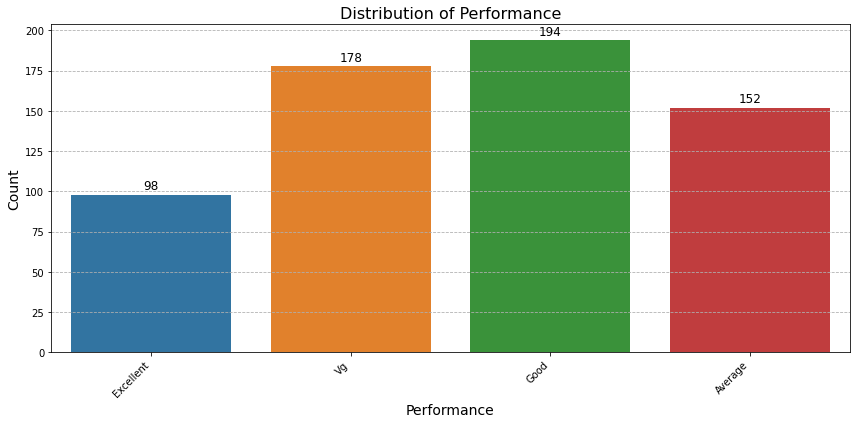

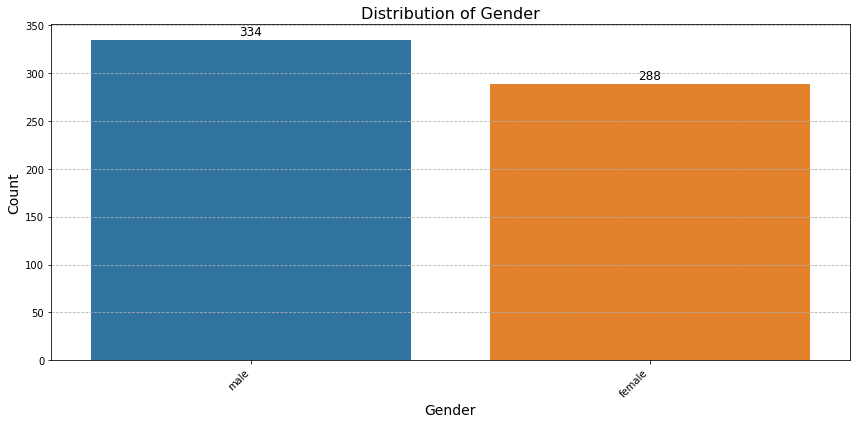

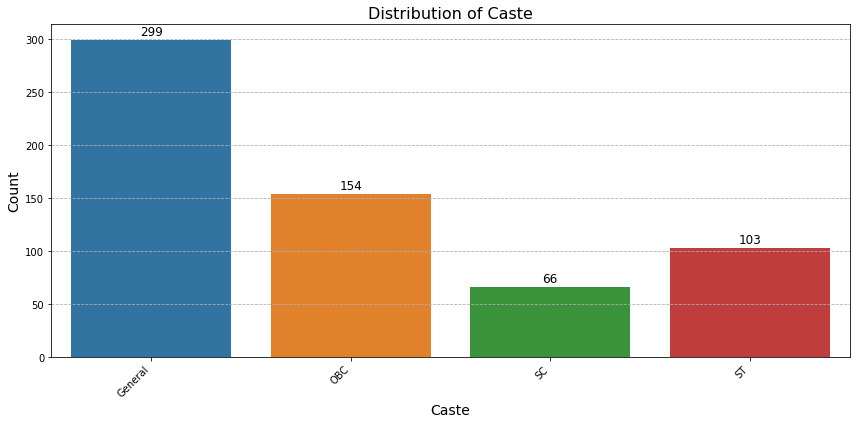

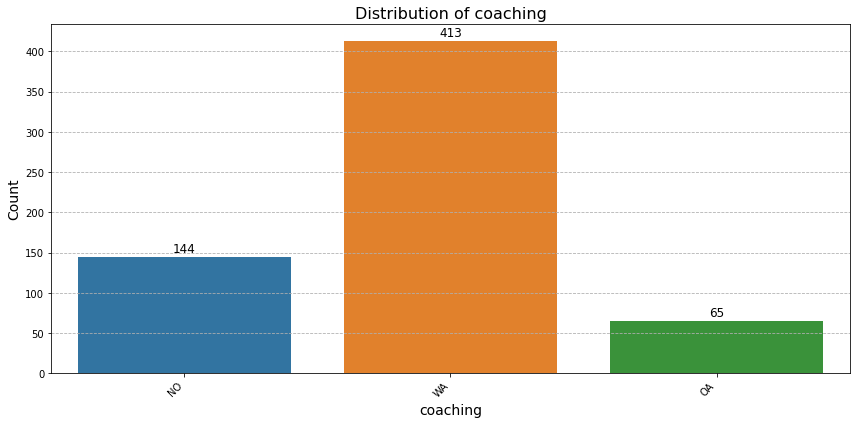

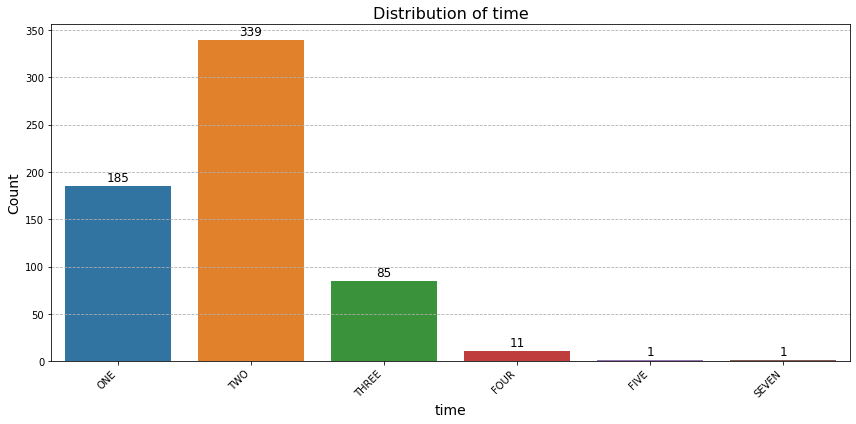

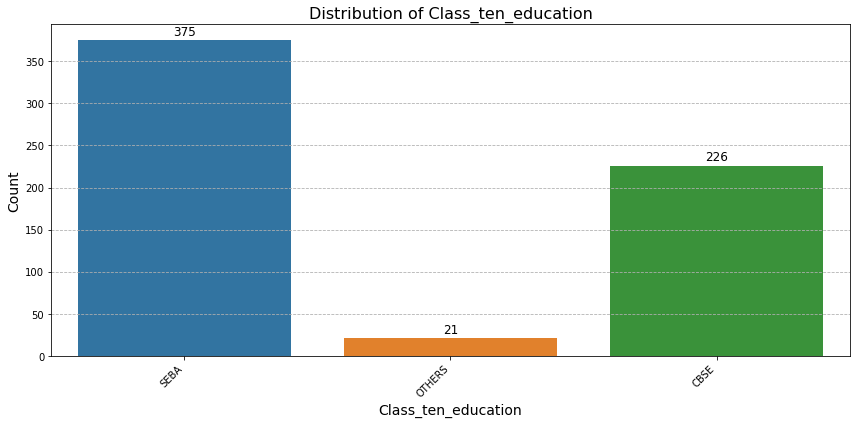

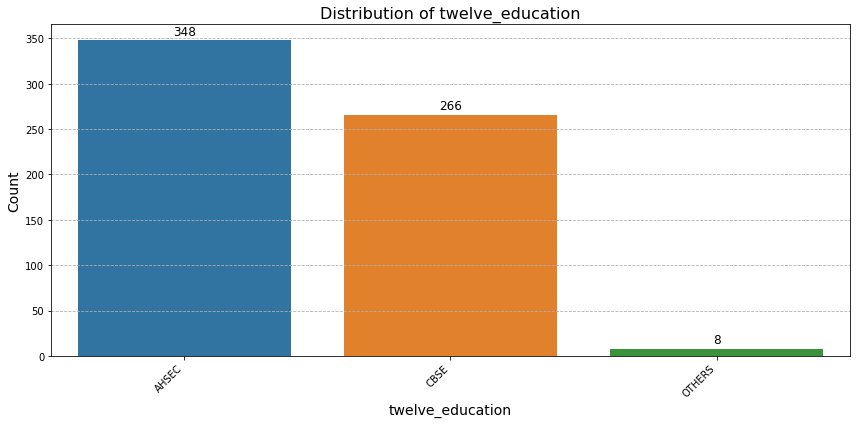

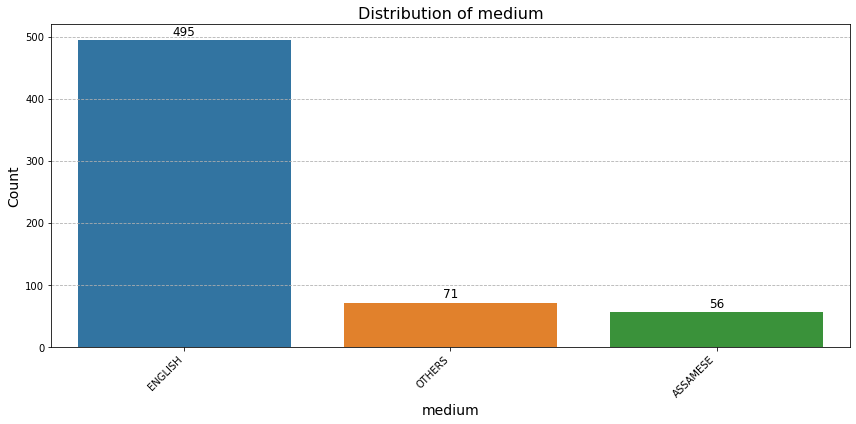

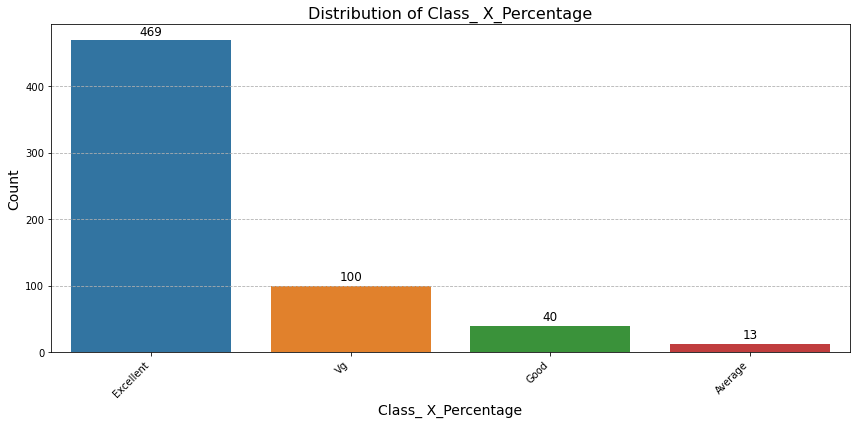

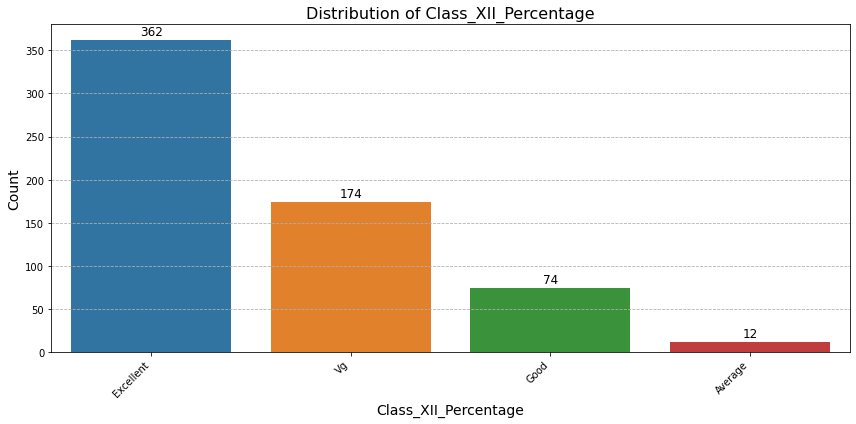

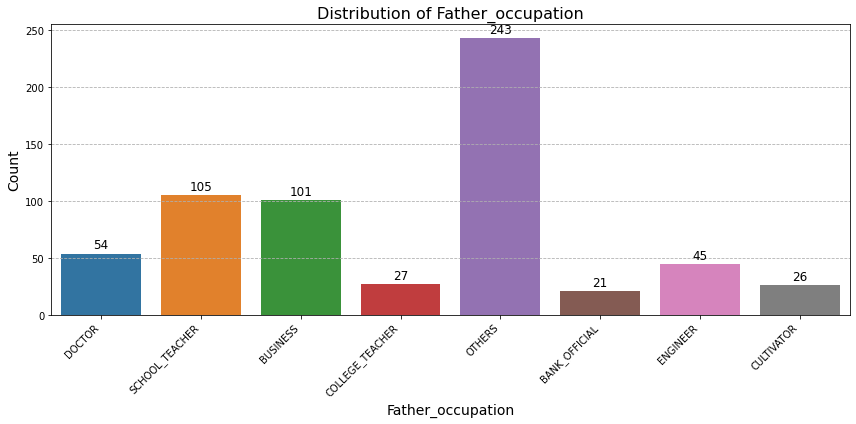

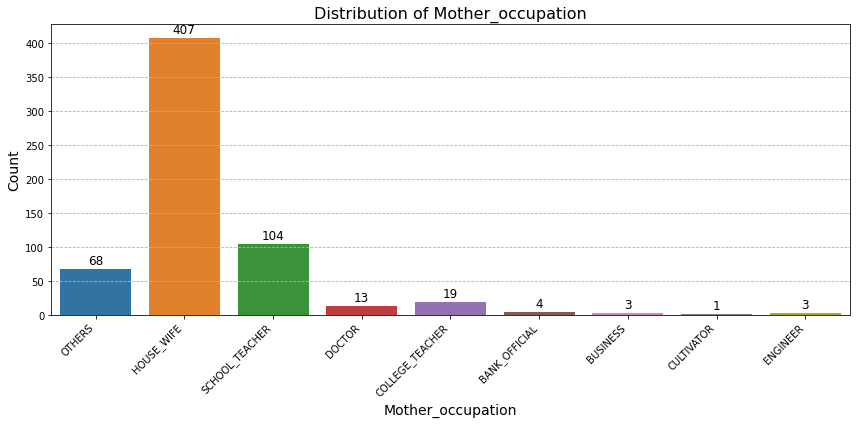

In [23]:
# Looking at the distributions
var_cat = df.select_dtypes(include=['object'])

for columna in var_cat.columns:
    plt.figure(figsize=(12, 6))
    
    # Crear el gráfico de barras
    ax = sns.countplot(data=df, x=columna)  
    plt.title(f'Distribution of {columna}', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    
    plt.xticks(rotation=45, ha='right')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')
    
    ax.grid(True, linestyle='--', axis='y')

    plt.tight_layout()  
    plt.show()

# Insights

### Distribución del rendimiento (Performance):
- La mayoría de los candidatos se clasifican en la categoría **"Good"** con 194 registros.
- Le sigue **"Very Good"** con 178 registros, **"Average"** con 152, y finalmente **"Excellent"** con 98 registros.

### Distribución por género (Gender):
- Se observa una mayor proporción de candidatos **hombres** en comparación con las **mujeres**.

### Distribución por casta (Caste):
- La categoría **"General"** tiene la mayor representación con 299 registros, mientras que **"SC"** tiene el menor número de registros.

### Distribución de asistencia a clases de preparación (Coaching):
- La categoría **"WA"** (dentro de Assam) domina con 413 registros, mientras que **"OA"** (fuera de Assam) presenta la menor cantidad de candidatos.

### Distribución por cantidad de horas dedicadas (Time):
- La mayoría de los candidatos reporta haber dedicado **"TWO"** horas al estudio, mientras que **"FOUR"**, **"FIVE"** y **"SEVEN"** horas tienen menos de 11 registros.

### Distribución de la educación en la clase diez (Class ten education):
- El sistema **"SEBA"** es el más común entre los candidatos, mientras que **"OTHERS"** tiene solo 21 casos.

### Distribución por idioma de instrucción en la clase doce (Medium):
- **"English"** es el idioma más frecuente, mientras que **"Other"** y **"Assamese"** tienen menos de 71 casos.

### Distribución del porcentaje en la clase doce (Class XII Percentage):
- La categoría **"Excellent"** tiene la mayor cantidad de casos, mientras que **"Average"** es la menor con solo 12 casos.

### Distribución de la ocupación del padre (Father occupation):
- La categoría **"Others"** es la más representada, seguida de **"School Teacher"**. La menor cantidad de casos se observa en la ocupación de **"Bank Official"**.


<AxesSubplot:title={'center':'Relationship between Performance'}>

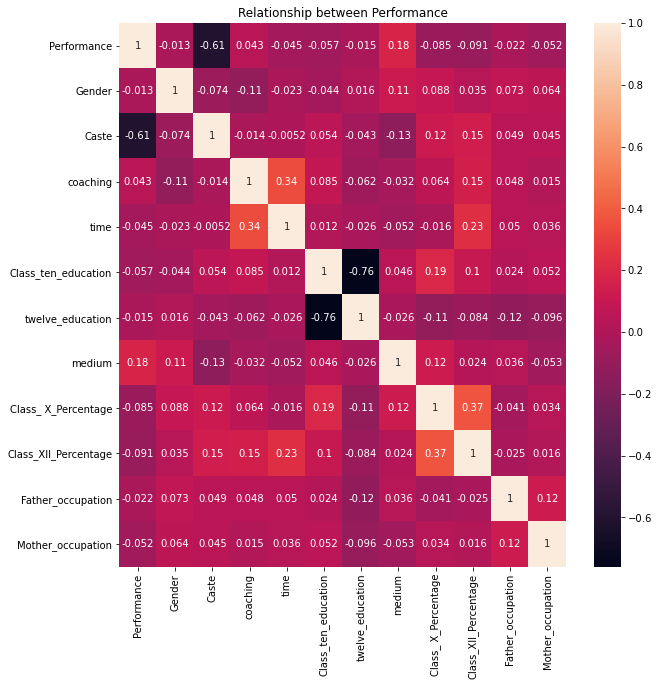

In [29]:
# Looking at the correlations
cat_encoder= LabelEncoder()
lista_colmuns= [col for col in df.columns]
for col in lista_colmuns:
  df[col]=cat_encoder.fit_transform(df[col])

corr_matrix=df.corr()
plt.figure(figsize=(10,10))
plt.title(f'Relationship between Performance')
sns.heatmap(corr_matrix,annot=True)

# Insights

### Análisis de Correlación:
- Observamos que la variable Caste tiene una correlación levemente alta correlación respecto al Target Performance
- La variable twelve_education y Class_ten_education tiene una alta correlación negativa (-76%)

# Preprocessing and Feature Engineering

In [30]:
y= df['Performance']
X=df.drop('Performance',axis=1)

In [32]:
df_OneHot= pd.get_dummies(df,columns=['Class_ X_Percentage','Class_XII_Percentage','medium','Caste'])
label_enconder= LabelEncoder()
df_OneHot['Performance']=label_enconder.fit_transform(df_OneHot['Performance'])

# Splitting the dataset
Realizamos una partición a los datos 70% Train y 30% Test

In [33]:
X_new=df_OneHot
y_new=df['Performance']
X_train, X_test, y_train, y = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Training the model

In [34]:
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluating the model

In [35]:
y_pred = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y, y_pred)
print(f'Model accuracy: {accuracy * 100:.2f}%')

Model accuracy: 95.19%


# Confusion Matrix

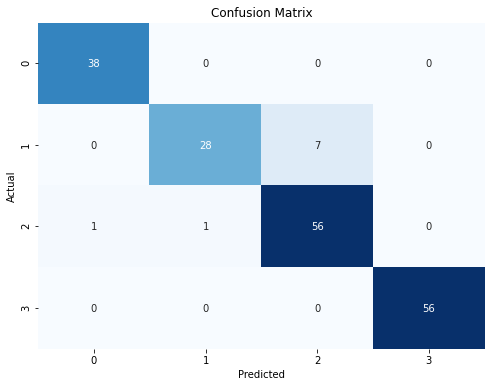

In [37]:

y_pred = random_forest_classifier.predict(X_test)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Improving the model
### Random Forest + Grid Search)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42, stratify=y_new)

# Definir el modelo
random_forest_classifier = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros para optimización
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Configurar Grid Search con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=random_forest_classifier, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajustar el modelo con el grid search
grid_search.fit(X_train, y_train)

# Mejor estimador encontrado
best_model = grid_search.best_estimastor_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Hacer predicciones en el set de prueba
y_pred = best_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Reporte de clasificación detallado
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Model accuracy: 98.40%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      0.90      0.95        29
           2       0.95      1.00      0.97        58
           3       1.00      1.00      1.00        54

    accuracy                           0.98       187
   macro avg       0.99      0.97      0.98       187
weighted avg       0.98      0.98      0.98       187

